In [1]:
from pandas import read_excel

from matplotlib import pyplot
series = read_excel('cv1.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

                           MV1        MV2        MV3        MV4        MV5  \
Date                                                                         
2019-07-15 06:00:00  52.277210  64.287964  63.809814  59.865784  61.913475   
2019-07-15 06:01:00  52.317898  63.936993  60.539707  61.055756  62.912544   
2019-07-15 06:02:00  52.418480  63.602665  65.157608  58.501160  63.257046   
2019-07-15 06:03:00  52.592255  61.956985  62.561069  67.342506  60.901077   
2019-07-15 06:04:00  52.766033  62.833214  63.129795  68.693382  63.470730   

                           MV6        DV1        DV2        DV3        DV4  \
Date                                                                         
2019-07-15 06:00:00  66.762009  63.723587  59.025074  62.884781  63.670155   
2019-07-15 06:01:00  66.227531  63.912422  58.774059  59.916000  61.564404   
2019-07-15 06:02:00  66.635620  66.385277  58.622467  61.299221  62.317005   
2019-07-15 06:03:00  68.507271  64.597672  58.094593  61.792000

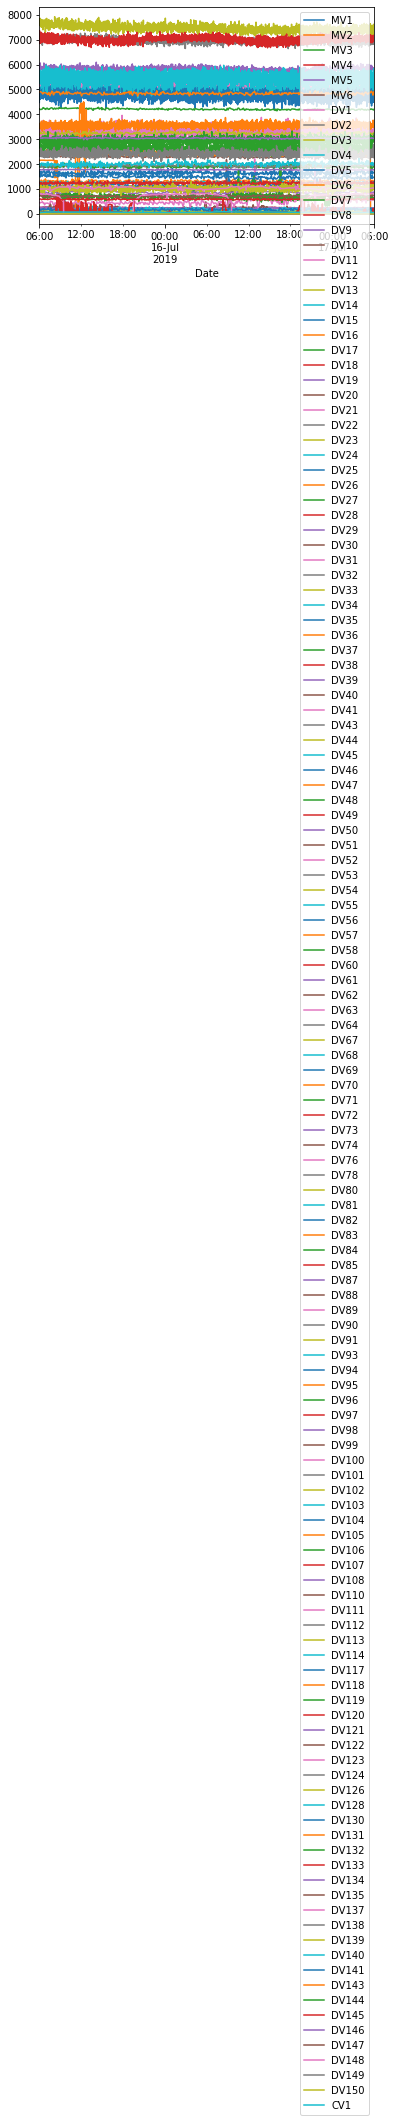

In [2]:
from pandas import read_excel
from matplotlib import pyplot
series = read_excel('cv1.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

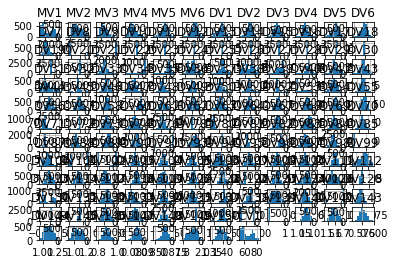

In [3]:
from pandas import read_excel
from matplotlib import pyplot
series = read_excel('cv1.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

In [4]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd
df = pd.read_excel('cv1.xlsx')

fig = go.Figure([go.Scatter(x=df['Date'], y=df['CV1'])])
fig.show()

In [6]:
string_columns = []
columns = df.columns

for col in columns:
    if df.dtypes[col] == "object":
       
       df[col] = pd.to_numeric(df[col], errors='coerce').fillna(method="ffill")

In [7]:
string_columns = []
columns = df.columns

for col in columns:
    if df.dtypes[col] == "object":
       column_values = list(df[col])
       

In [9]:
print(df.dtypes)

Date     datetime64[ns]
MV1             float64
MV2             float64
MV3             float64
MV4             float64
              ...      
DV147           float64
DV148           float64
DV149           float64
DV150           float64
CV1             float64
Length: 158, dtype: object


In [10]:
columns = df.columns
for x in columns:
  if df[x].dtypes != "float64":
     print("column ",x," type ",df[x].dtypes)

column  Date  type  datetime64[ns]
column  DV12  type  int64
column  DV13  type  int64
column  DV16  type  int64
column  DV17  type  int64
column  DV64  type  int64
column  DV80  type  int64
column  DV114  type  int64
column  DV130  type  int64


In [13]:
Dates = df["Date"]
df["Date"] = pd.to_datetime(df["Date"])
df.set_index(keys='Date', inplace=True)

In [14]:
df = df.astype(float)

In [17]:
columns = df.columns
for x in columns:
  if df[x].dtypes != "float64":
     print("column ",x," type ",df[x].dtypes)

In [18]:
df = df.astype(float)

In [20]:
print(df.isnull().sum())
for x in columns:
  if df.isnull().sum()[x] != 0:
     print(df.isnull().sum()[x]," missing value found in column : ", x)

MV1      0
MV2      0
MV3      0
MV4      0
MV5      0
        ..
DV147    0
DV148    0
DV149    0
DV150    0
CV1      0
Length: 157, dtype: int64


In [22]:
import numpy as np
x_train = np.array(df[[columns[i] for i in range(0,len(columns)-1)]])
y_train = np.array(df["CV1"])

In [23]:
y_train = y_train.reshape(-1, 1)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
print("training data shape :",x_train.shape)
print("training variable CV1 shape ",y_train.shape)

training data shape : (2881, 156)
training variable CV1 shape  (2881, 1)


In [26]:
full_sequence_xtrain = x_train
full_sequence_ytrain = y_train

x_test = x_train[2448:]
y_test = y_train[2448:]
x_train = x_train[0:2448]
y_train = y_train[0:2448]

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [27]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (2448, 156)
y_train shape :  (2448, 1)
x_test shape :  (433, 156)
y_test shape :  (433, 1)


In [31]:
# create and fit the LSTM network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential()
model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
153/153 - 9s - loss: 0.0779 - root_mean_squared_error: 0.2791 - 9s/epoch - 62ms/step
Epoch 2/100
153/153 - 7s - loss: 0.0609 - root_mean_squared_error: 0.2468 - 7s/epoch - 47ms/step
Epoch 3/100
153/153 - 7s - loss: 0.0571 - root_mean_squared_error: 0.2390 - 7s/epoch - 48ms/step
Epoch 4/100
153/153 - 7s - loss: 0.0387 - root_mean_squared_error: 0.1967 - 7s/epoch - 47ms/step
Epoch 5/100
153/153 - 7s - loss: 0.0326 - root_mean_squared_error: 0.1806 - 7s/epoch - 46ms/step
Epoch 6/100
153/153 - 7s - loss: 0.0295 - root_mean_squared_error: 0.1717 - 7s/epoch - 47ms/step
Epoch 7/100
153/153 - 8s - loss: 0.0286 - root_mean_squared_error: 0.1690 - 8s/epoch - 52ms/step
Epoch 8/100
153/153 - 7s - loss: 0.0295 - root_mean_squared_error: 0.1718 - 7s/epoch - 46ms/step
Epoch 9/100
153/153 - 7s - loss: 0.0252 - root_mean_squared_error: 0.1589 - 7s/epoch - 47ms/step
Epoch 10/100
153/153 - 7s - loss: 0.0244 - root_mean_squared_error: 0.1561 - 7s/epoch - 47ms/step
Epoch 11/100
153/153 - 7s - l

Text(0.5, 0, 'epoch')

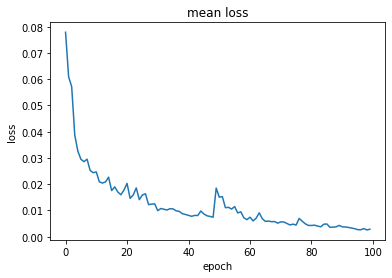

In [33]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.title('mean loss')
plt.ylabel('loss')
plt.xlabel('epoch')

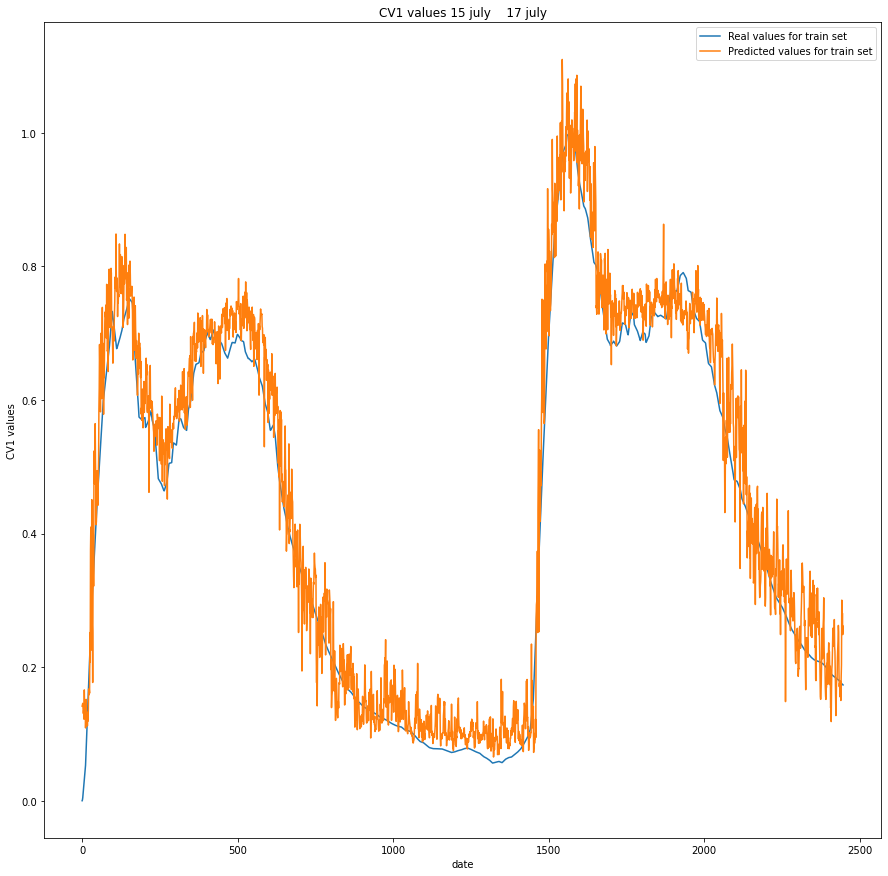

In [37]:
full_sequence_predictions = model.predict(full_sequence_xtrain)
predictions = model.predict(x_train)
plt.figure(figsize=(15,15))
plt.plot(iter[0:2448], y_train,label='Real values for train set')
plt.plot(iter[0:2448], predictions,label='Predicted values for train set')
plt.xlabel("date")
plt.ylabel("CV1 values")
plt.title("CV1 values 15 july "+"   17 july")
plt.legend()